# Unsupervised Learning on Country Data

El conjunto de datos utilizado en el proyecto de agrupamiento de países para HELP International contiene 167 países y 10 variables que representan factores socioeconómicos y de salud. Estas variables son:

- **country**: Nombre del país (167 valores únicos).
- **child_mort**: Tasa de mortalidad infantil (niños menores de 5 años por cada 1000 nacidos vivos).
- **exports**: Exportaciones de bienes y servicios per cápita (como porcentaje del PIB per cápita).
- **health**: Gasto total en salud per cápita (como porcentaje del PIB per cápita).
- **imports**: Importaciones de bienes y servicios per cápita (como porcentaje del PIB per cápita).
- **income**: Ingreso neto por persona.
- **inflation**: Tasa de crecimiento anual del PIB total.
- **life_expect**: Esperanza de vida al nacer (en años).
- **total_fer**: Número de hijos que nacerían por mujer si se mantuvieran las tasas de fertilidad actuales.
- **gdpp**: PIB per cápita (calculado como el PIB total dividido por la población total).



In [1]:
import pandas as pd

df = pd.read_csv('Country-data.csv')
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [2]:
from tools_ml.eval_data import data_values
# Mostramos los valores de las variables categoricas y rango de las variables numericas
data_values(df)

country (object)
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Leso

In [4]:
from tools_ml.eval_data import filtrar_correlaciones, calcular_vif

# Variables que tienen correlaciones menores al -0.5 y mayores al 0.5
filtrar_correlaciones(df, [-0.5,0.5], 'country')

child_mort  income       -0.524315
            life_expec   -0.886676
            total_fer     0.848478
exports     imports       0.737381
            income        0.516784
income      life_expec    0.611962
            total_fer    -0.501840
            gdpp          0.895571
life_expec  total_fer    -0.760875
            gdpp          0.600089
dtype: float64

In [5]:
# Variables que aumentan su varianza por la multicolinealidad (>10 : multicolinealidad severa)
calcular_vif(df,7, 'country')

,Variable,VIF
0,child_mort,8.084814
1,exports,16.084236
2,health,12.421525
3,imports,17.280234
4,income,13.414051
6,life_expec,21.916807
7,total_fer,17.673828
8,gdpp,10.298641


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


child_mort 
Minimum:2.60
Mean:38.27
Median:19.30
Mode:4.50
Maximum:208.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


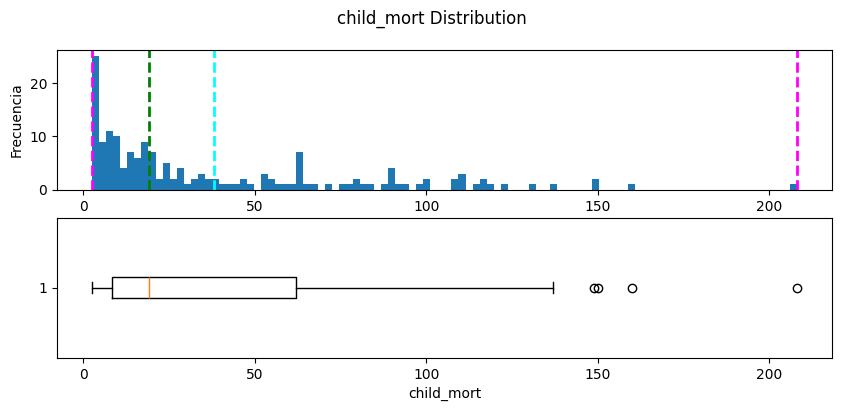

------------------------------------------------------------------------------
exports 
Minimum:0.11
Mean:41.11
Median:35.00
Mode:23.80
Maximum:200.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


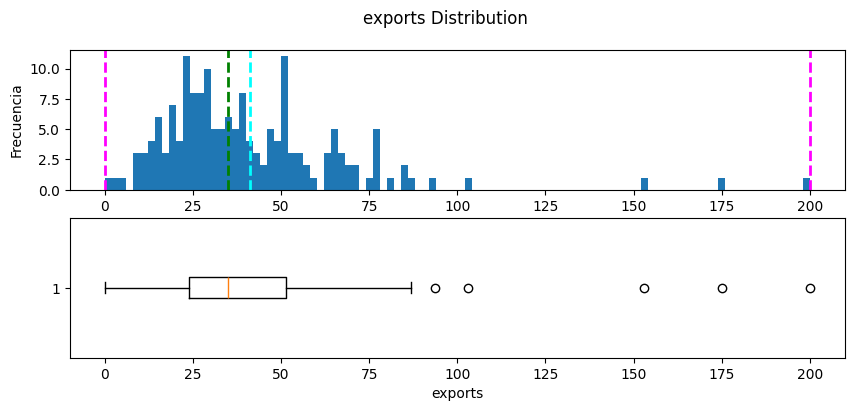

------------------------------------------------------------------------------
health 
Minimum:1.81
Mean:6.82
Median:6.32
Mode:5.07
Maximum:17.90



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


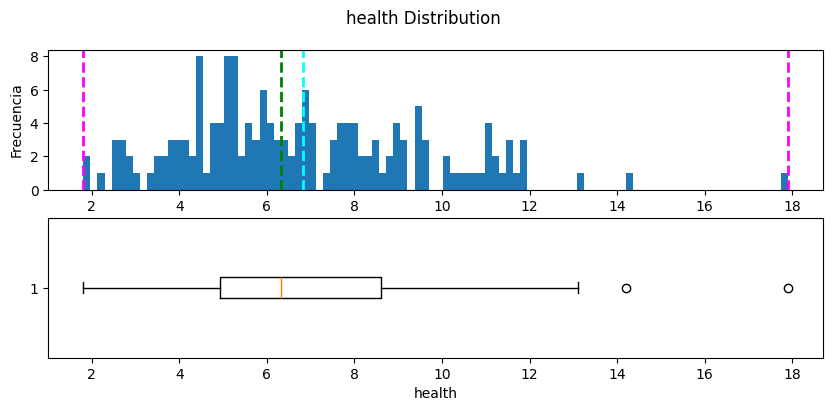

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


------------------------------------------------------------------------------
imports 
Minimum:0.07
Mean:46.89
Median:43.30
Mode:19.40
Maximum:174.00



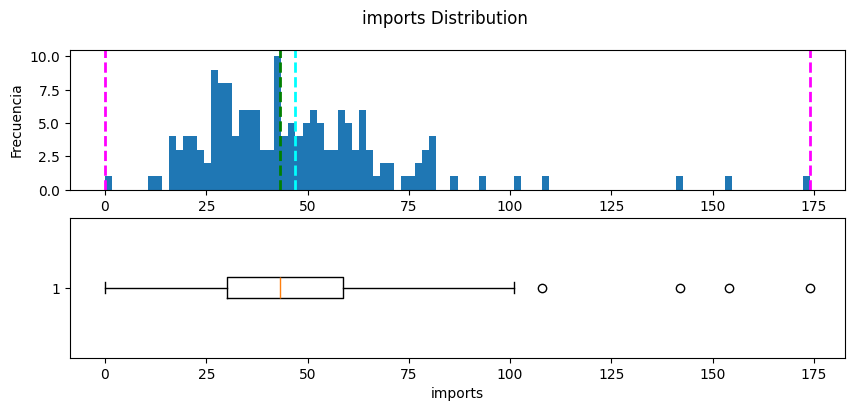

------------------------------------------------------------------------------
income 
Minimum:609.00
Mean:17144.69
Median:9960.00
Mode:1390.00
Maximum:125000.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


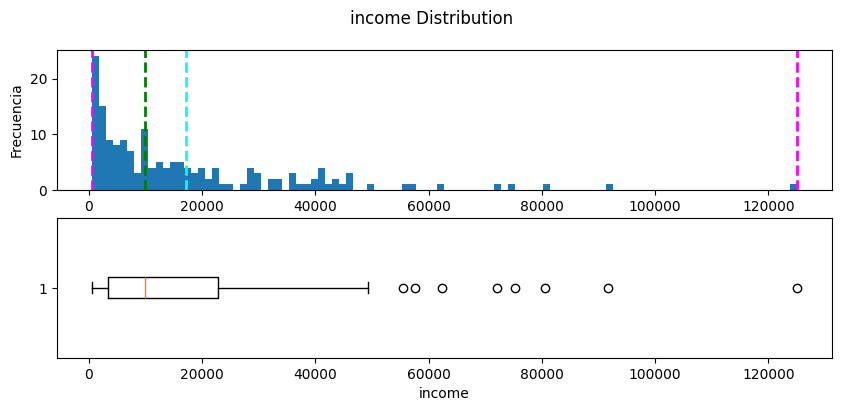

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


------------------------------------------------------------------------------
inflation 
Minimum:-4.21
Mean:7.78
Median:5.39
Mode:16.60
Maximum:104.00



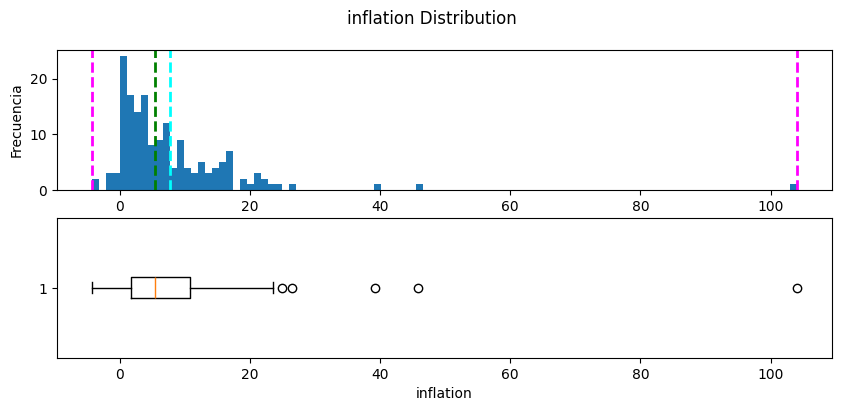

------------------------------------------------------------------------------
life_expec 
Minimum:32.10
Mean:70.56
Median:73.10
Mode:70.40
Maximum:82.80



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


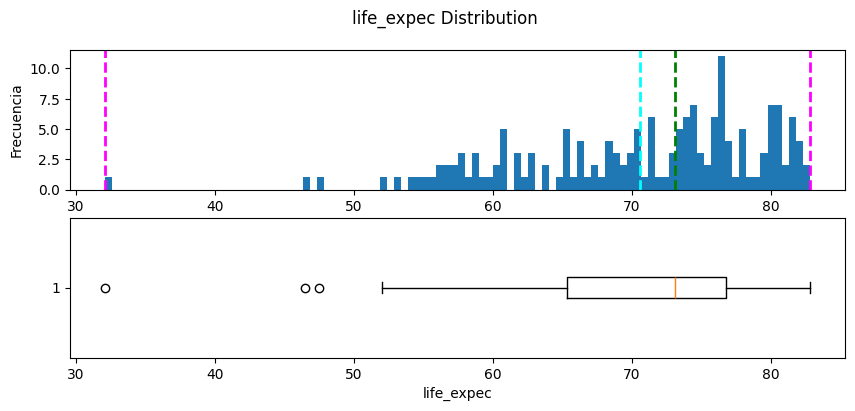

------------------------------------------------------------------------------
total_fer 
Minimum:1.15
Mean:2.95
Median:2.41
Mode:1.57
Maximum:7.49



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


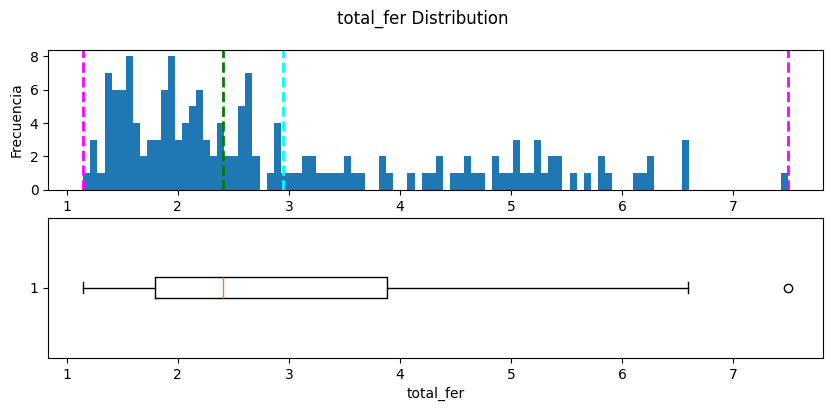

------------------------------------------------------------------------------
gdpp 
Minimum:231.00
Mean:12964.16
Median:4660.00
Mode:1310.00
Maximum:105000.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


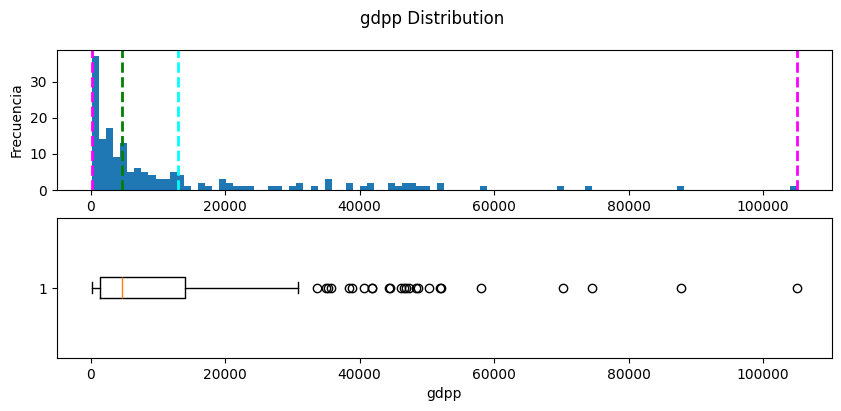

------------------------------------------------------------------------------


In [7]:
from tools_ml import recursos_graficos as rg 
import matplotlib.pyplot as plt

%matplotlib inline


num_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in num_cols:
    rg.distribution_Data(df[col])
    print('------------------------------------------------------------------------------')

In [8]:
# No hay valores faltantes
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Escalado de datos

In [9]:
from sklearn.preprocessing import StandardScaler

scaaler = StandardScaler()

df_contry_scaler = scaaler.fit_transform(df[num_cols])

# Data escalada
df_contry_scaler

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [10]:
# Data escalada
df_scaleer = pd.DataFrame(df_contry_scaler, columns=num_cols)
df_scaleer.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


# Reduccion de Dimensionalidad (PCA)

Instanciamos y entrenamos el modelo pca, el objetivo es la cantidad de variables solo usando las que explican la mayor variabilidad de los datos

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaleer)
pca_data_scaled = pca.transform(df_scaleer)

pca_data_scaled.shape

(167, 9)

Los ratios de varianza explican cuanta influencia hay de esa variable para explicar los datos. Es acumulativo, osea que mientras mas variables uses, los ratios se sumaran explicando la mayor variablidad de la data

Aqui se busca seleccionar los datos que cuentan con mayor ratio

In [12]:
# Ratio de varianza
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Visualizamos la importancia acumulativa de los ratos, por ejemplo para usando 4 variables podriamos explicar el 94% de la variabilidad de los datos. 

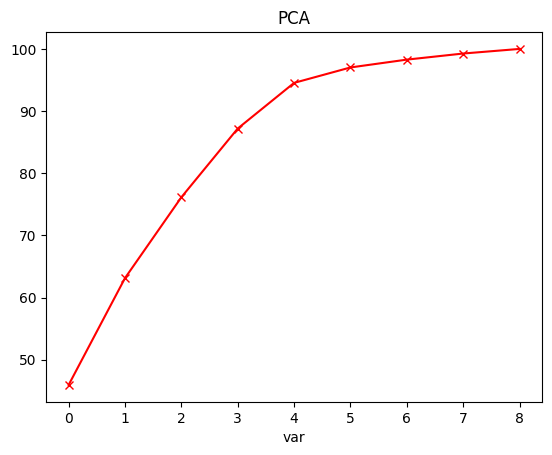

In [14]:
import numpy as np
sum_var = np.cumsum(np.round(var,4)*100)     # Proceso acumulativo 

plt.plot(sum_var,'r-x')
plt.title('PCA')
plt.xlabel('var')
plt.show()


Reducimos el set de datos original de 8 variables a 4

In [16]:
pca_data = pd.DataFrame(pca_data_scaled)
pca_data.drop([4,5,6,7,8], axis=1, inplace= True)

pca_data.head(3)

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115


# K-Means

## USANDO PCA

Punto de cambio (entero): 5
4.710393833629331


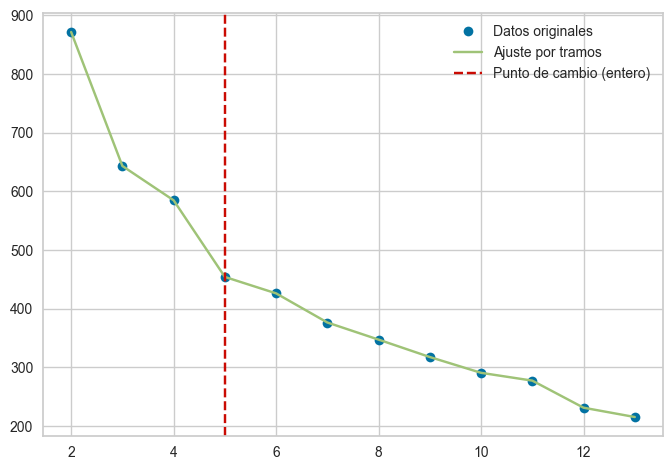

In [17]:
from sklearn.cluster import KMeans
from tools_ml.eval_kmeans import elbow_point

# Analizamos las inercias de los clusters
K = range(2,14)
innerts = []

for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(pca_data)
    innerts.append(km.inertia_)


elbow_point(K, innerts)



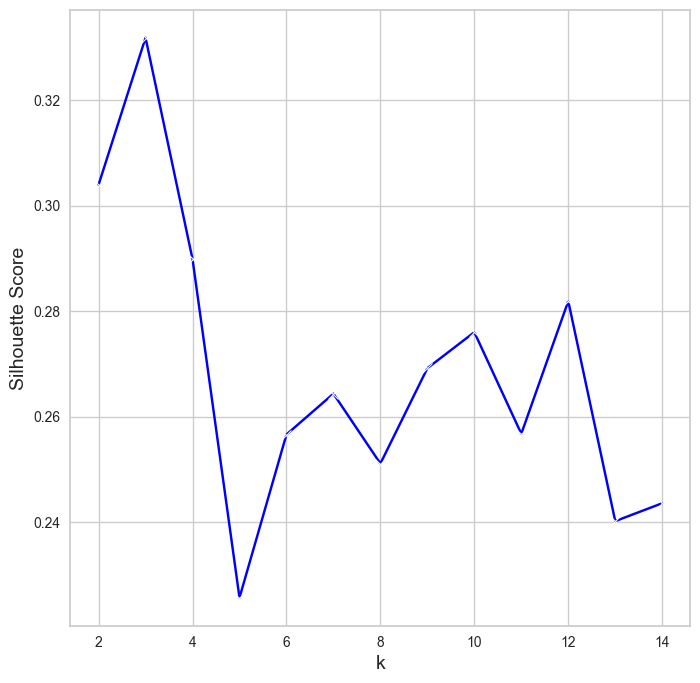

In [18]:
from tools_ml.eval_kmeans import silhouette_graff

km = KMeans(n_init='auto')   # Modelo general instanciado

silhouette_graff(km,pca_data)

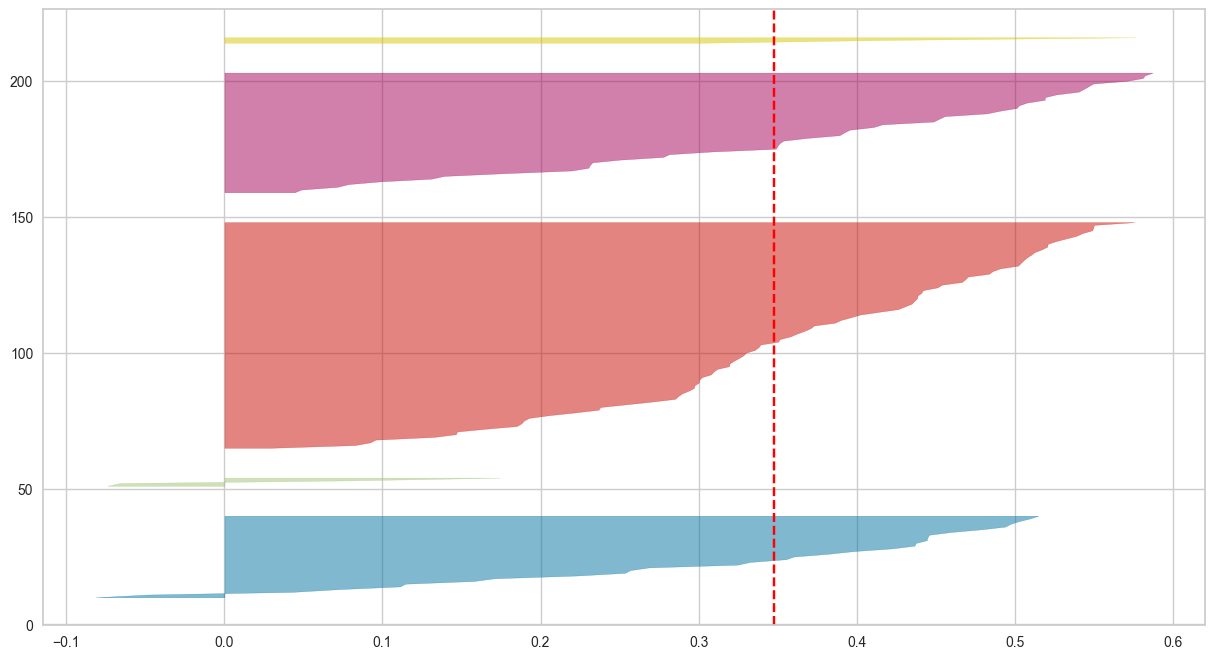

In [20]:
from tools_ml.eval_kmeans import SilhouetteVisualizer_Model

km = KMeans(n_clusters= 5,n_init='auto')

SilhouetteVisualizer_Model(km,pca_data)

In [32]:
km = KMeans(n_clusters= 5,n_init='auto')
y_pred_kmeans = km.fit_predict(df_contry_scaler)
df['kmeans'] = y_pred_kmeans

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


## SIN USAR PCA

In [25]:
df_scaleer.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Punto de cambio (entero): 3
3.1037527201276918


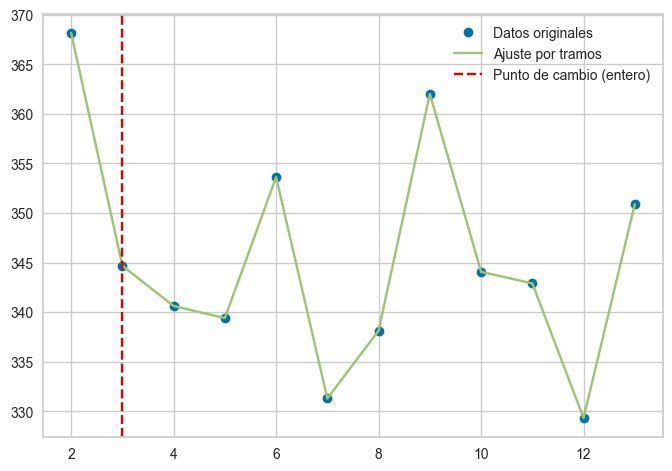

In [29]:
from sklearn.cluster import KMeans
from tools_ml.eval_kmeans import elbow_point

# Analizamos las inercias de los clusters
K = range(2,14)
innerts = []

for k in K:
    km_sin_pca = KMeans(n_clusters=k, n_init='auto')
    km_sin_pca = km.fit(df_scaleer)
    innerts.append(km_sin_pca.inertia_)


elbow_point(K, innerts)

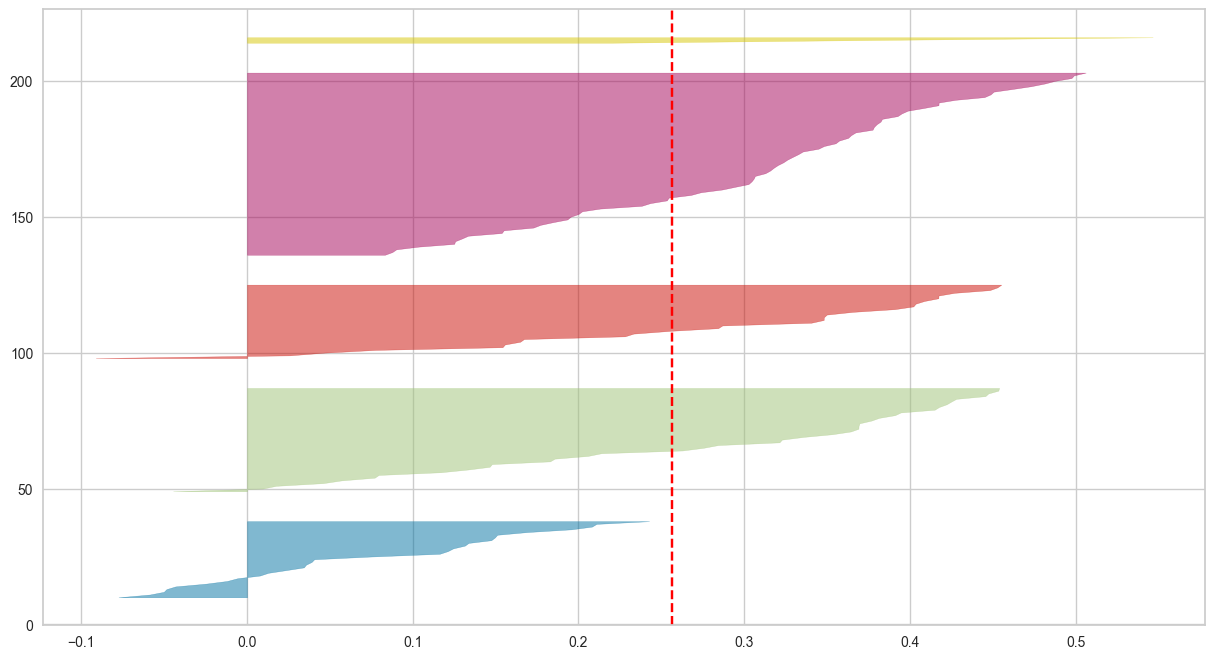

In [30]:
km_sin_pca = KMeans(n_clusters= 5, n_init='auto')
SilhouetteVisualizer_Model(km_sin_pca, df_scaleer)

In [33]:
km_sin_pca = KMeans(n_clusters= 5, n_init='auto')
df['kmeans_sin_pca'] = km_sin_pca.fit_predict(df_scaleer)

df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,kmeans_sin_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0


In [36]:
km = KMeans(n_clusters= 5,n_init='auto')
y_pred_kmeans = km.fit_predict(df_contry_scaler)

pca_data['kmeans'] = y_pred_kmeans

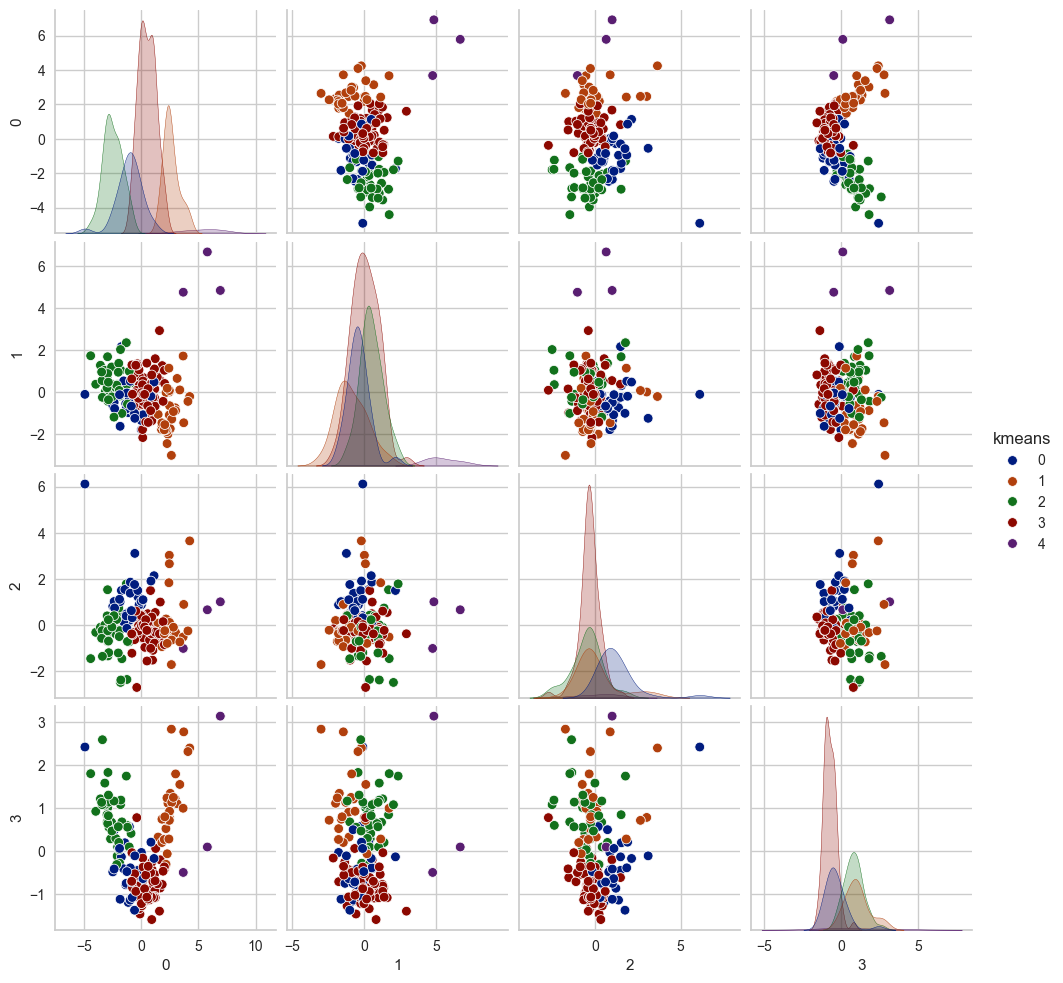

In [38]:
import seaborn as sns 

sns.pairplot(pca_data, hue='kmeans', palette= 'dark')

# Herarchical Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

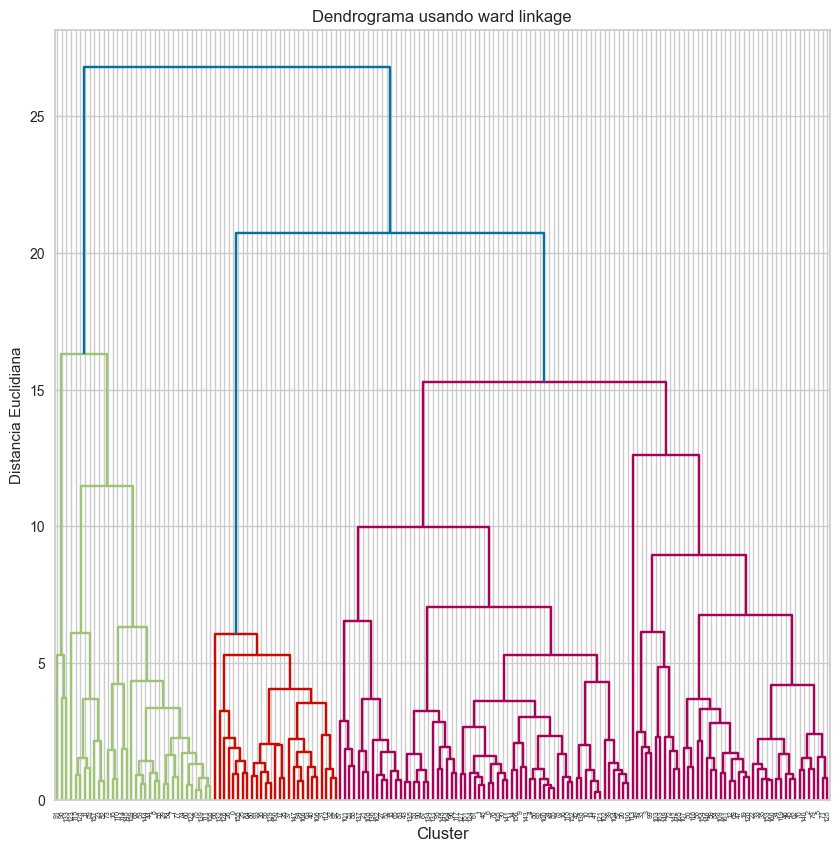

In [19]:
from tools_ml.eval_hierarchical import dendrogram_visualization
# Data sin PCA
dendrogram_visualization(df_contry_scaler, 'ward')

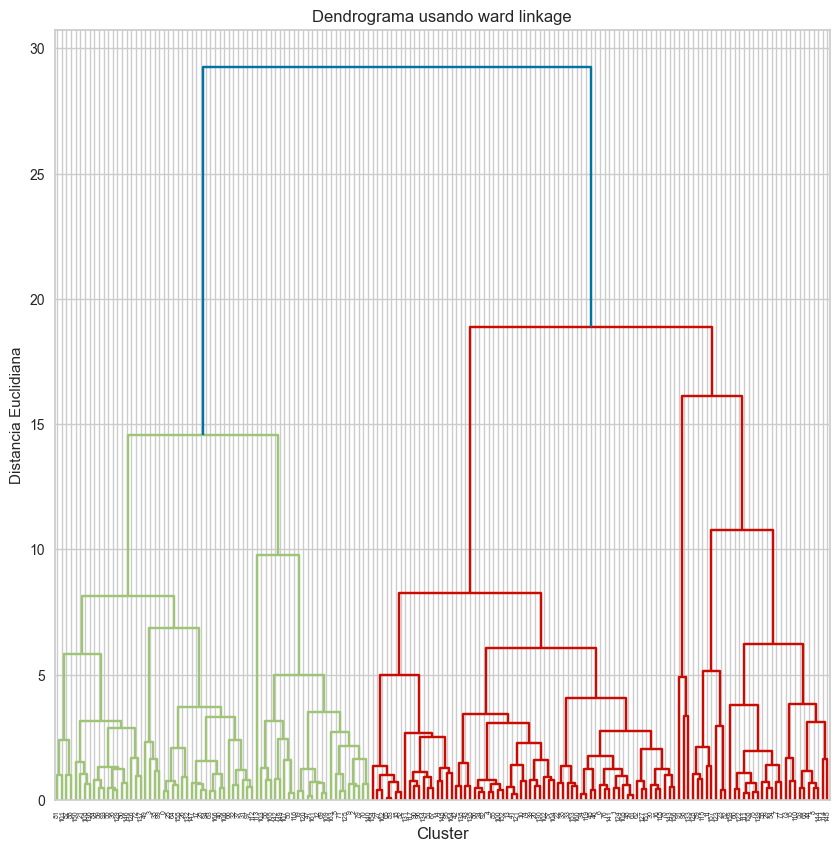

In [20]:
# Data con PCA
dendrogram_visualization(pca_data, 'ward')

In [44]:
pca_data.drop('kmeans', axis=1)

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
5,0.022407,-1.779187,0.869997,-0.036967
6,-0.101584,-0.568252,0.242092,-1.466266
7,2.342165,-1.988459,0.190344,1.105038
8,2.973764,-0.734689,-0.519766,1.205442
9,-0.181487,-0.402866,0.867459,-0.438773


In [60]:
from sklearn.cluster import AgglomerativeClustering
pca_train = pca_data[[0,1,2,3]]

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_train)

df['hc'] = y_hc

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


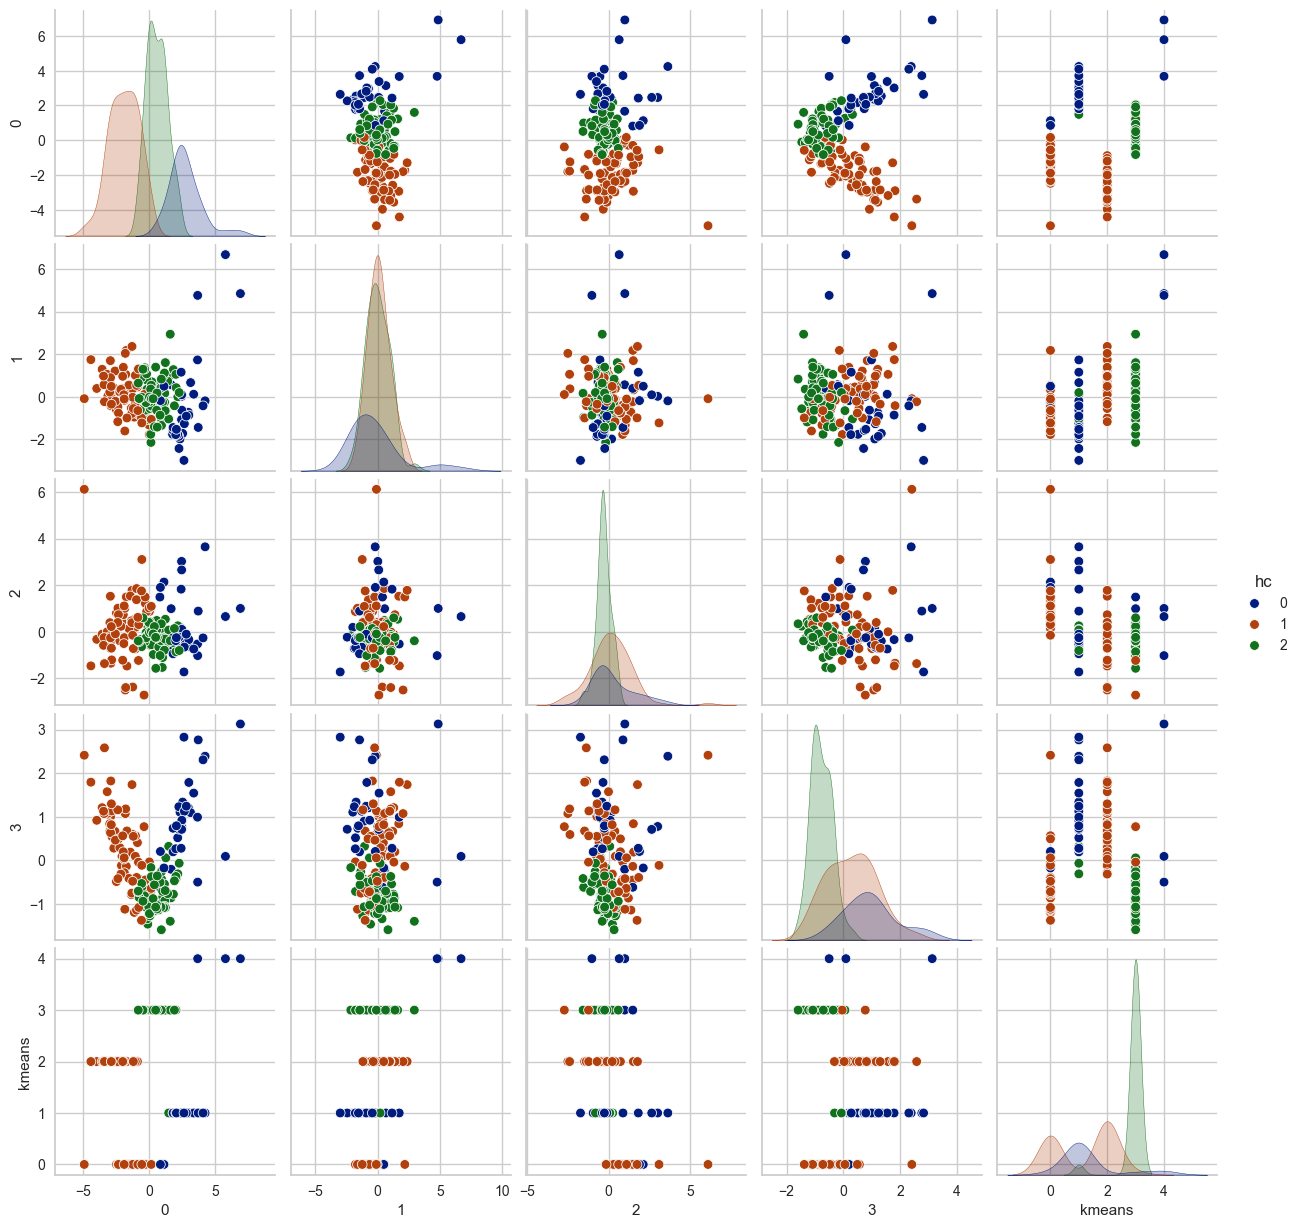

In [59]:
sns.pairplot(pca_data, hue='hc', palette= 'dark')

In [61]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,kmeans_sin_pca,hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,2


# DBSCAN

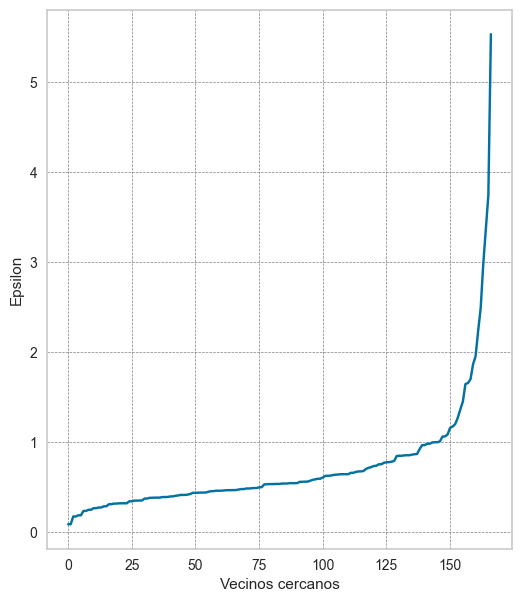

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(pca_train)

distances, indices = neighbors_fit.kneighbors(pca_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]   # Valor del vecino mas cercano (segunda columna de la matriz de distancias)

fig = plt.figure(figsize=(6,7))
plt.plot(distances)
plt.xlabel('Vecinos cercanos')
plt.ylabel('Epsilon') 

# Cuadrícula personalizada
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()

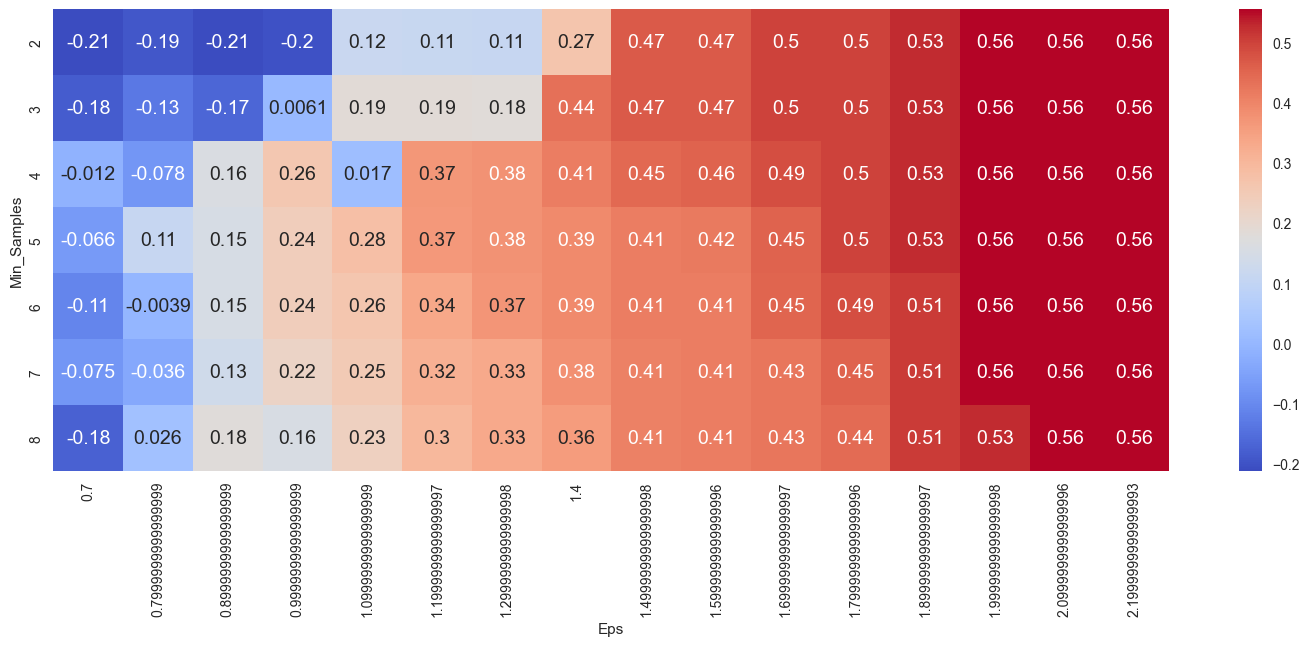

In [79]:
from tools_ml.eval_dbscan import heatmap_eps_neighbors

eps = np.arange(0.7, 2.2, 0.1)
min_samples = np.arange(2,9)

heatmap_eps_neighbors(pca_train, eps, min_samples)


In [ ]:
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def heatmap_eps_neighbors(X, eps_values:list[float], min_samples:list[int]= None):

    """
    Muestra un heatmap enfocado en el mejor coeficiente de silueta para un valor de epsilon y n_vecinos cercanos

    Parameters: 
    - X: data para clustering
    - eps_values:list[float]: rango o valores de epsilon que deseamos testear
    - min_samples:list[int]: cantidad de vecinos que queremos tomar para cada epsilon (por defecto np.arange(2,10))


    Return:
    Heatmap     
    """



    if min_samples is None:
        min_samples = np.arange(2,10)   # Por defecto

    # Creamos una lista que contiene pares (epsilon, k_vecinos_cercanos)
    dbscan_paramns = list(product(eps_values,min_samples))

    sil_scores = []     # Almacenamos los coeficientes de silueta para cada par de parametros a testear

    # Obtencion de los coeficientes de silueta para el rango de epsilon
    for p in dbscan_paramns: 
        y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
        sil_scores.append(silhouette_score(X,y_pred))

    # Convertimos el par de parametros de testeo en un DataFrame
    df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])

    # Agregamos los coeficientes de silueta correspondientes al par de hiperparametros
    df_paramns_tunning['sil_scores'] = sil_scores

    # Pivotamos el dataframe
    pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',
                            index='Min_Samples',
                            columns='Eps')

    # Visualizamos los datos con un heatmap que nos ayude a identificar que valores son los mas eficientes 
    fig, ax  = plt.subplots(figsize =(18,6))
    sns.heatmap(pivot_data, annot=True, annot_kws={'size':14}, cmap='coolwarm', ax = ax)
    plt.show()


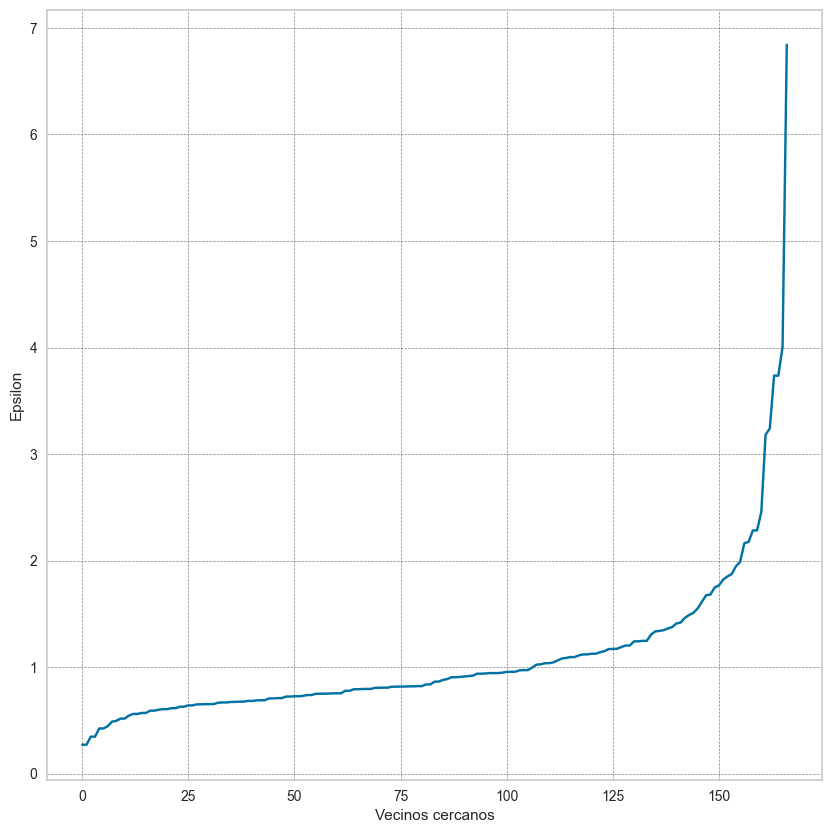

In [85]:
from tools_ml.eval_dbscan import epsilon_neighbors
epsilon_neighbors(pca_data_scaled)